In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import sys
%matplotlib inline

In [61]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.datasets import load_digits
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
from sklearn import metrics

In [62]:
from sklearn import linear_model

In [63]:
from sklearn.feature_selection import SelectKBest, chi2

In [64]:
import math

In [65]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression

In [66]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor

In [67]:
from sklearn.model_selection import GridSearchCV

In [68]:
from sklearn.feature_selection import f_regression
from sklearn.model_selection import cross_val_score

Target Variable: Volume Sales
Promotional Levers: Feature Count, Feature Share; Display Count, Display Share; Distribution %; Price per unit, Price per Volume

1. No. Find most important few variables using a correlation matrix or chi square test or both 
2. No. Use all variables as input to the model, use just the important to the model for better understanding
3. Done. Train, test, validation to be split on *Date*
4. Mac can't handle compute. Screw train, test, validation and use cross validation instead?
5. Mac can't handle compute. Optimize model params using GridSearch and Pipeline

Observations
---
Need to remove Volue Share by Category because the model overfit (when given Volume Sales as target) to Linear Regression

In [69]:
df = pd.read_csv("../Focus Area - Driver Analysis, Visualisation/GAC Hackathon_Sales_Data.csv")

In [70]:
df.isnull().sum().sum()

348226

In [71]:
df.head()

Product Brewer Value Brand Value  \
0  BRAND130 6-PACK 11.2-13 OZ GLASS          ABI    BRAND130   
1  BRAND130 6-PACK 11.2-13 OZ GLASS          ABI    BRAND130   
2  BRAND130 6-PACK 11.2-13 OZ GLASS          ABI    BRAND130   
3  BRAND130 6-PACK 11.2-13 OZ GLASS          ABI    BRAND130   
4  BRAND130 6-PACK 11.2-13 OZ GLASS          ABI    BRAND130   

             Package Value Segment Value AB Segment Value AB Subsegment Value  \
0  6-PACK 11.2-13 OZ GLASS  CRAFT/IMPORT          HE BEER              IMPORT   
1  6-PACK 11.2-13 OZ GLASS  CRAFT/IMPORT          HE BEER              IMPORT   
2  6-PACK 11.2-13 OZ GLASS  CRAFT/IMPORT          HE BEER              IMPORT   
3  6-PACK 11.2-13 OZ GLASS  CRAFT/IMPORT          HE BEER              IMPORT   
4  6-PACK 11.2-13 OZ GLASS  CRAFT/IMPORT          HE BEER              IMPORT   

  AB Megasegment Value       Date  Display Count  \
0           ABOVE CORE   1/6/2013            NaN   
1           ABOVE CORE  1/13/2013            NaN   
2           ABOVE CORE  1/20/2013            NaN   
3           ABOVE CORE  1/27/2013            NaN   
4           ABOVE CORE   2/3/2013            NaN   

                 ...                 \
0                ...                  
1                ...                  
2                ...                  
3                ...                  
4                ...                  

   Resident Population in city, Thousands of Persons, Annual, Not Seasonally Adjusted  \
0                                          10045.175                                    
1                                          10045.175                                    
2                                          10045.175                                    
3                                          10045.175                                    
4                                          10045.175                                    

   Per Capita Personal Income in city, Dollars, Annual, Not Seasonally Adjusted  \
0                                            47580.0                              
1                                            47580.0                              
2                                            47580.0                              
3                                            47580.0                              
4                                            47580.0                              

   Occupancy (%)   Labor Force in city  Employment in city  \
0     0.696310312              4945000             4439700   
1     0.696310312              4945000             4439700   
2     0.696310312              4945000             4439700   
3     0.696310312              4945000             4439700   
4     0.753158406              4948900             4446700   

   Unemployment in city  Unemp. Rate in city  \
0                505300                0.102   
1                505300                0.102   
2                505300                0.102   
3                505300                0.102   
4                502200                0.101   

   Consumer Price Index, Malt Beverages  Consumer Price Index, Wine  \
0                                 1.259                       9.822   
1                                 1.259                       9.822   
2                                 1.259                       9.822   
3                                 1.259                       9.822   
4                                 1.315                      11.534   

   Producer Price Index by Industry  
0                               NaN  
1                               NaN  
2                               NaN  
3                               NaN  
4                               NaN  

[5 rows x 53 columns]

In [72]:
df['AB Segment Value'].unique()

array(['HE BEER', 'CORE', 'HE NEAR BEER', 'VALUE', 'NON ALC'], dtype=object)

In [151]:
def print_against_feature_name(columns, numbers, n_records = None):
    pairs = {}
    for i in np.arange(len(columns)):
        pairs[columns[i]] =  numbers[i]
#     pairs.sort(key=lambda tup: -tup[1])
    return pairs

In [74]:
def MSE(y_target, y_prediction):
    return ((y_target - y_prediction) ** 2).mean(axis=0)

In [75]:
from datetime import datetime

In [76]:
df['Date'] = pd.Series([datetime.strptime(element, '%m/%d/%Y').date() for element in df['Date']] )

In [77]:
data = df.copy()

In [174]:
quant_features = [u'Display Count', u'Display Share', u'Distribution (%)',
       u'Feature Count', u'Feature Share', u'Price per Unit',u'Volume Sales',
       u'Price per Volume', u'Unit Sales', u'Volume Share of Category',
       u' Average of Max TemperatureC ', u' Average of Mean TemperatureC ',
       u' Average of Min TemperatureC ', u' Average of Dew PointC ',
       u' Average of MeanDew PointC ', u' Average of Min DewpointC ',
       u' Average of Max Humidity ', u' Average of  Mean Humidity ',
       u' Average of  Min Humidity ',
       u' Average of  Max Sea Level PressurehPa ',
       u' Average of  Mean Sea Level PressurehPa ',
       u' Average of  Min Sea Level PressurehPa ',
       u' Average of  Max VisibilityKm ', u' Average of  Mean VisibilityKm ',
       u' Average of  Min VisibilitykM ', u' Average of  Max Wind SpeedKm/h ',
       u' Average of  Mean Wind SpeedKm/h ',
       u' Average of  Max Gust SpeedKm/h ', u' Average of Precipitationmm ',
       u' Average of  CloudCover ', u' Average of WindDirDegrees ',
       u' State GDP(Millions of dollars, seasonally adjusted at annual rates.) ',
       u' Alcohol Retail Trade employees (in 1000s, State) ',
       u'State Personal income (thousands of dollars, seasonally adjusted,quarterly)',
       u'Resident Population in city, Thousands of Persons, Annual, Not Seasonally Adjusted',
       u'Per Capita Personal Income in city, Dollars, Annual, Not Seasonally Adjusted',
       u'Labor Force in city', u'Employment in city', u'Unemployment in city',
       u'Unemp. Rate in city', u'Consumer Price Index, Malt Beverages',
       u'Consumer Price Index, Wine', u'Producer Price Index by Industry']

# Store scalings in a dictionary so we can convert back later
scaled_features = {}
for each in quant_features:
    mean, std = data[each].mean(), data[each].std()
    scaled_features[each] = [mean, std]
    data.loc[:, each] = (data[each] - mean)/std

In [175]:
dummy_features = df.columns.difference(quant_features)

In [176]:
dummy_features

Index([u'AB Megasegment Value', u'AB Segment Value', u'AB Subsegment Value',
       u'Brand Value', u'Brewer Value', u'Date', u'Occupancy (%) ',
       u'Package Value', u'Product', u'Segment Value'],
      dtype='object')

In [177]:
dummy_features = dummy_features.difference(['Brand Value', 'Brewer Value', 'Package Value', 'Product', 'Occupancy (%) ', 'Package Values', 'Product'])

In [178]:
df2 = df[dummy_features]
df3 = df[quant_features]

In [179]:
df2 = pd.get_dummies(df2, dummy_na=True)

In [180]:
df_merged = pd.concat([df2, df3])

In [181]:
# df_merged.columns

In [182]:
# del numerical_df['Occupancy (%) ']
# this is a string, removed as a temporary hack
# del df_merged['Volume Share of Category']

In [183]:
target = ['Volume Sales', 'Volume Share of Category', 'Unit Sales']

In [184]:
y = np.nan_to_num(df_merged['Volume Sales'].values)

In [185]:
df_merged = df_merged[df_merged.columns.difference(target)]
X = np.nan_to_num(df_merged.values)

In [186]:
# [value for value in df_merged.columns]

In [187]:
df_merged[u' Average of  Mean Humidity '].describe()

count    76752.000000
mean        61.218292
std          9.692844
min         31.428571
25%         54.892857
50%         64.214286
75%         68.285714
max         78.000000
Name:  Average of  Mean Humidity , dtype: float64

In [188]:
np.isnan(X).any()

False

In [189]:
split = int(math.ceil(len(X)*0.75))

In [190]:
X_train = X[:split]
X_test = X[split:]
y_train = y[:split]
y_test = y[split:]

In [191]:
# X_new = SelectKBest(k=4).fit_transform(X, y)

In [192]:
lm = linear_model.LinearRegression(normalize = True)
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=True)

In [193]:
linear_model_predictions = lm.predict(X_test)

In [194]:
r2 = lm.score(X_test, y_test)
r2

0.32324141311475907

In [195]:
# print_against_feature_name(columns = df_merged.columns, numbers = lm.coef_)

In [196]:
MSE(y_prediction=linear_model_predictions, y_target=y_test)

6190171.9105432145

In [197]:
# y_string = np.asarray(y, dtype="|S6")
rfr = RandomForestRegressor()
rfr.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

In [198]:
predictions = rfr.predict(X_test)

In [199]:
rfr.score(X_test, y_test)

0.49080218482108279

In [200]:
MSE(y_prediction = predictions, y_target=y_test)

4657527.9183934499

In [201]:
y_test.shape, predictions.shape

((38376,), (38376,))

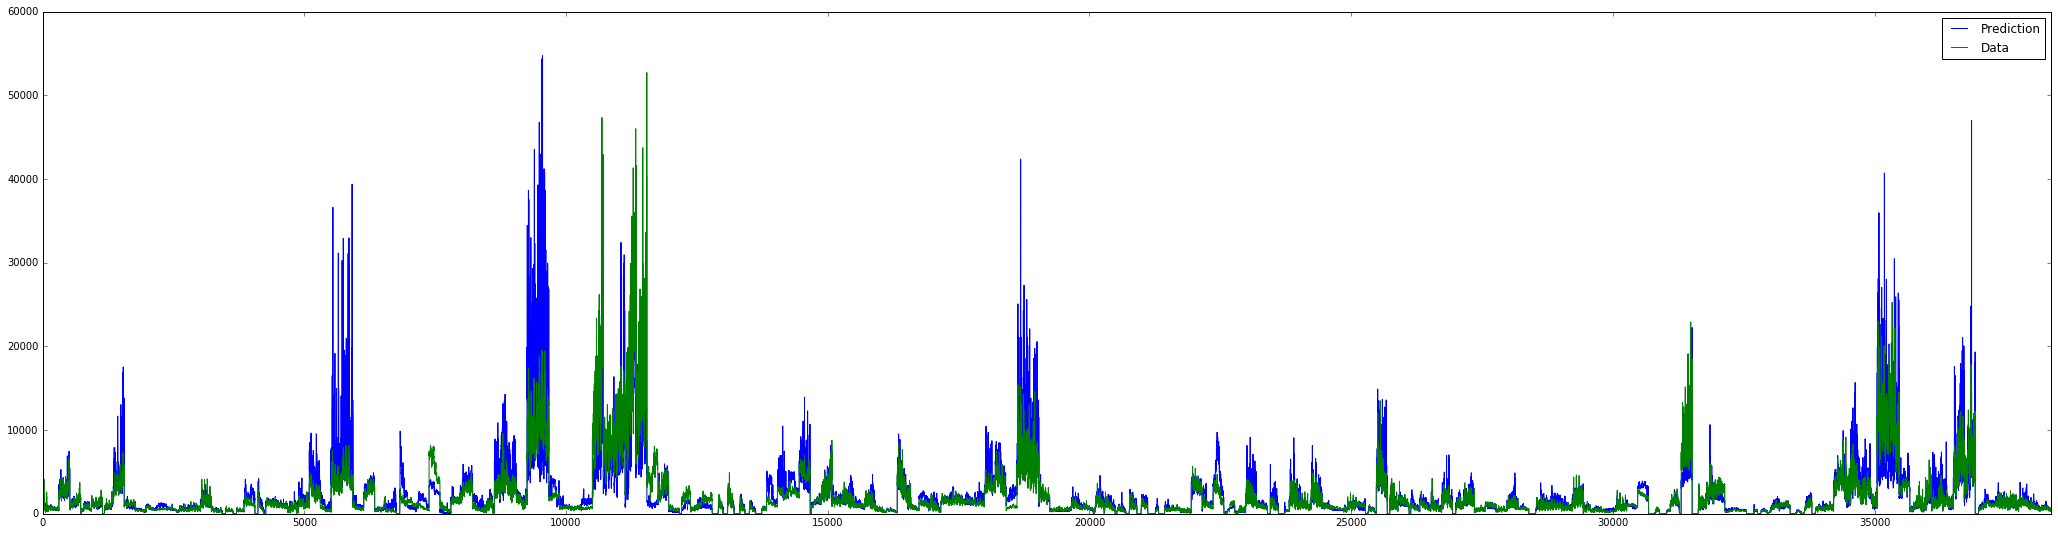

In [202]:
fig, ax = plt.subplots(figsize=(36,9))

# mean, std = scaled_features['cnt']
# predictions = network.run(test_features)*std + mean
ax.plot(predictions, label='Prediction')
ax.plot(y_test, label='Data')
ax.set_xlim(right=len(predictions))
ax.legend()
plt.show()
# dates = pd.to_datetime(rides.ix[test_data.index]['dteday'])
# dates = dates.apply(lambda d: d.strftime('%b %d'))
# ax.set_xticks(np.arange(len(dates))[12::24])
# _ = ax.set_xticklabels(dates[12::24], rotation=45)

In [203]:
from sklearn.linear_model import RidgeCV, LassoCV, ElasticNetCV
from sklearn import model_selection
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeRegressor

In [204]:
def compare_models():
    seed = 7
    # prepare models
    models = []
    models.append(('LR', LinearRegression()))
    models.append(('Tree', DecisionTreeRegressor()))
    models.append(('RFR', RandomForestRegressor()))
    # models.append(('Ridge', RidgeCV()))
    models.append(('Lasso', LassoCV()))
    models.append(('ElasticNet', ElasticNetCV()))
    # models.append(('NN', MLPClassifier()))
    # evaluate each model in turn
    results = []
    names = []
    scoring = 'neg_mean_squared_error'
    for name, model in models:
    #     kfold = model_selection.KFold(n_splits=10, random_state=seed)
        cv_results = cross_val_score(model, X, y, cv=5, scoring=scoring)
        results.append(cv_results)
        names.append(name)
        msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
        print(msg)
    
    fig = plt.figure()
    fig.suptitle('Algorithm Comparison')
    ax = fig.add_subplot(111)
    plt.boxplot(results)
    ax.set_xticklabels(names)
    ax.set_ylabel('Negative Mean Square Error \n (Scoring Metric)')
    plt.show()

LR: -11571641.642052 (7891463.771423)
Tree: -7986042.671466 (7730496.810519)
RFR: -5719177.985177 (5493224.108181)
Lasso: -14036039.175010 (12890150.891297)
ElasticNet: -14036063.879265 (12890137.787727)


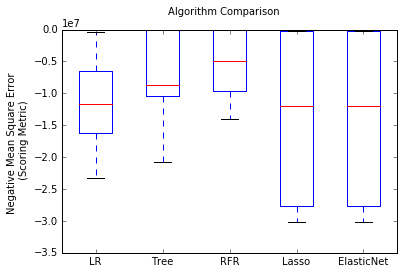

In [205]:
compare_models()

In [119]:
pltdata = print_against_feature_name(df_merged.columns, rfr.feature_importances_)

In [110]:
print_against_feature_name(df_merged.columns, lm.coef_)

[('AB Segment Value_NON ALC', 47432593807694.578),
 ('AB Subsegment Value_VALUE LIGHT', 17134536590233.094),
 ('AB Subsegment Value_VALUE MALT', 17134536590232.98),
 ('AB Subsegment Value_VALUE REGULAR', 17134536590232.648),
 ('AB Subsegment Value_PREMIUM REGULAR', 6866001872909.6572),
 ('AB Subsegment Value_PREMIUM LIGHT', 6866001872909.6494),
 ('AB Megasegment Value_ABOVE CORE', 3669479935946.9326),
 ('AB Subsegment Value_NON ALCOHOL', 3100258531306.4316),
 ('Segment Value_PREMIUM PLUS', 2865418099094.5693),
 ('AB Megasegment Value_CORE & VALUE', 1413676962724.22),
 ('Date_2013-01-06', 499898127173.83472),
 ('Date_2013-03-03', 499898127173.81946),
 ('Date_2014-06-08', 499898127173.79932),
 ('Date_2013-02-10', 499898127173.7887),
 ('Date_2014-07-06', 499898127173.77966),
 ('Date_2013-02-17', 499898127173.77887),
 ('Date_2013-02-24', 499898127173.76935),
 ('Date_2013-04-21', 499898127173.76819),
 ('Date_2013-04-14', 499898127173.76782),
 ('Date_2013-03-17', 499898127173.7666),
 ('Date_

In [111]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [112]:
importances = rfr.feature_importances_
std = np.std([tree.feature_importances_ for tree in rfr.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
# print("Feature ranking:")

# for f in range(X.shape[1]):
#     print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

In [133]:
importance.columns

Index([u'Importance', u'Std'], dtype='object')

In [155]:
pltdata = print_against_feature_name(df_merged.columns,rfr.feature_importances_)

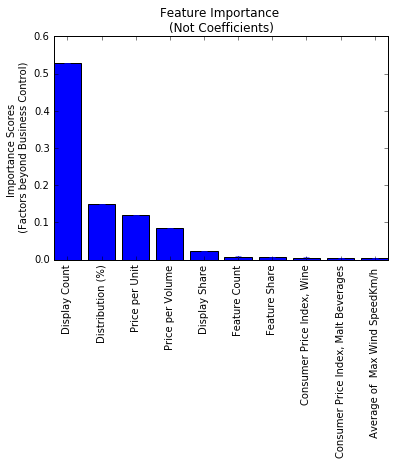

In [163]:
importance = rfr.feature_importances_
importance = pd.DataFrame(pltdata.values(), index=pltdata.keys(), 
                          columns=["Importance"])

importance["Std"] = np.std([tree.feature_importances_
                            for tree in rfr.estimators_], axis=0)

importance = importance.sort_values(by='Importance', ascending=False)
importance = importance[:10]
x = range(importance.shape[0])
y = importance.ix[:, 0]
yerr = importance.ix[:, 1]
plt.xticks(range(10),importance.index.values, rotation = 90)
plt.bar(x, y, yerr=yerr, align="center")
plt.title('Feature Importance \n(Not Coefficients)')
plt.ylabel('Importance Scores \n (Factors beyond Business Control)')
plt.show()

In [ ]:
plt.

In [114]:
# param_grid = { 
#     'n_estimators': [200, 900],
#     'max_features': ['auto', 'sqrt', 'log2']
# }

In [59]:
# CV_rfc = GridSearchCV(estimator=rfr, param_grid=param_grid, cv= 5, scoring = 'neg_mean_squared_error')
# CV_rfc.fit(X, y)

In [194]:
# print CV_rfc.best_params_

In [152]:
# CV_rfc = RandomizedSearchCV(estimator=rfr, param_distributions=param_grid, cv= 5, n_iter= 3, scoring = 'neg_mean_squared_error')
# CV_rfc.fit(X, y)